In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [122]:
base = "data/"

def get_data():
    data = {}
    for filename in sorted(os.listdir(base)):
        filepath = base + filename
        filename_without_ext = filename.split('.')[0]
        with open(filepath) as f:
            data[filename_without_ext] = np.loadtxt(filepath, delimiter=',')
    return data


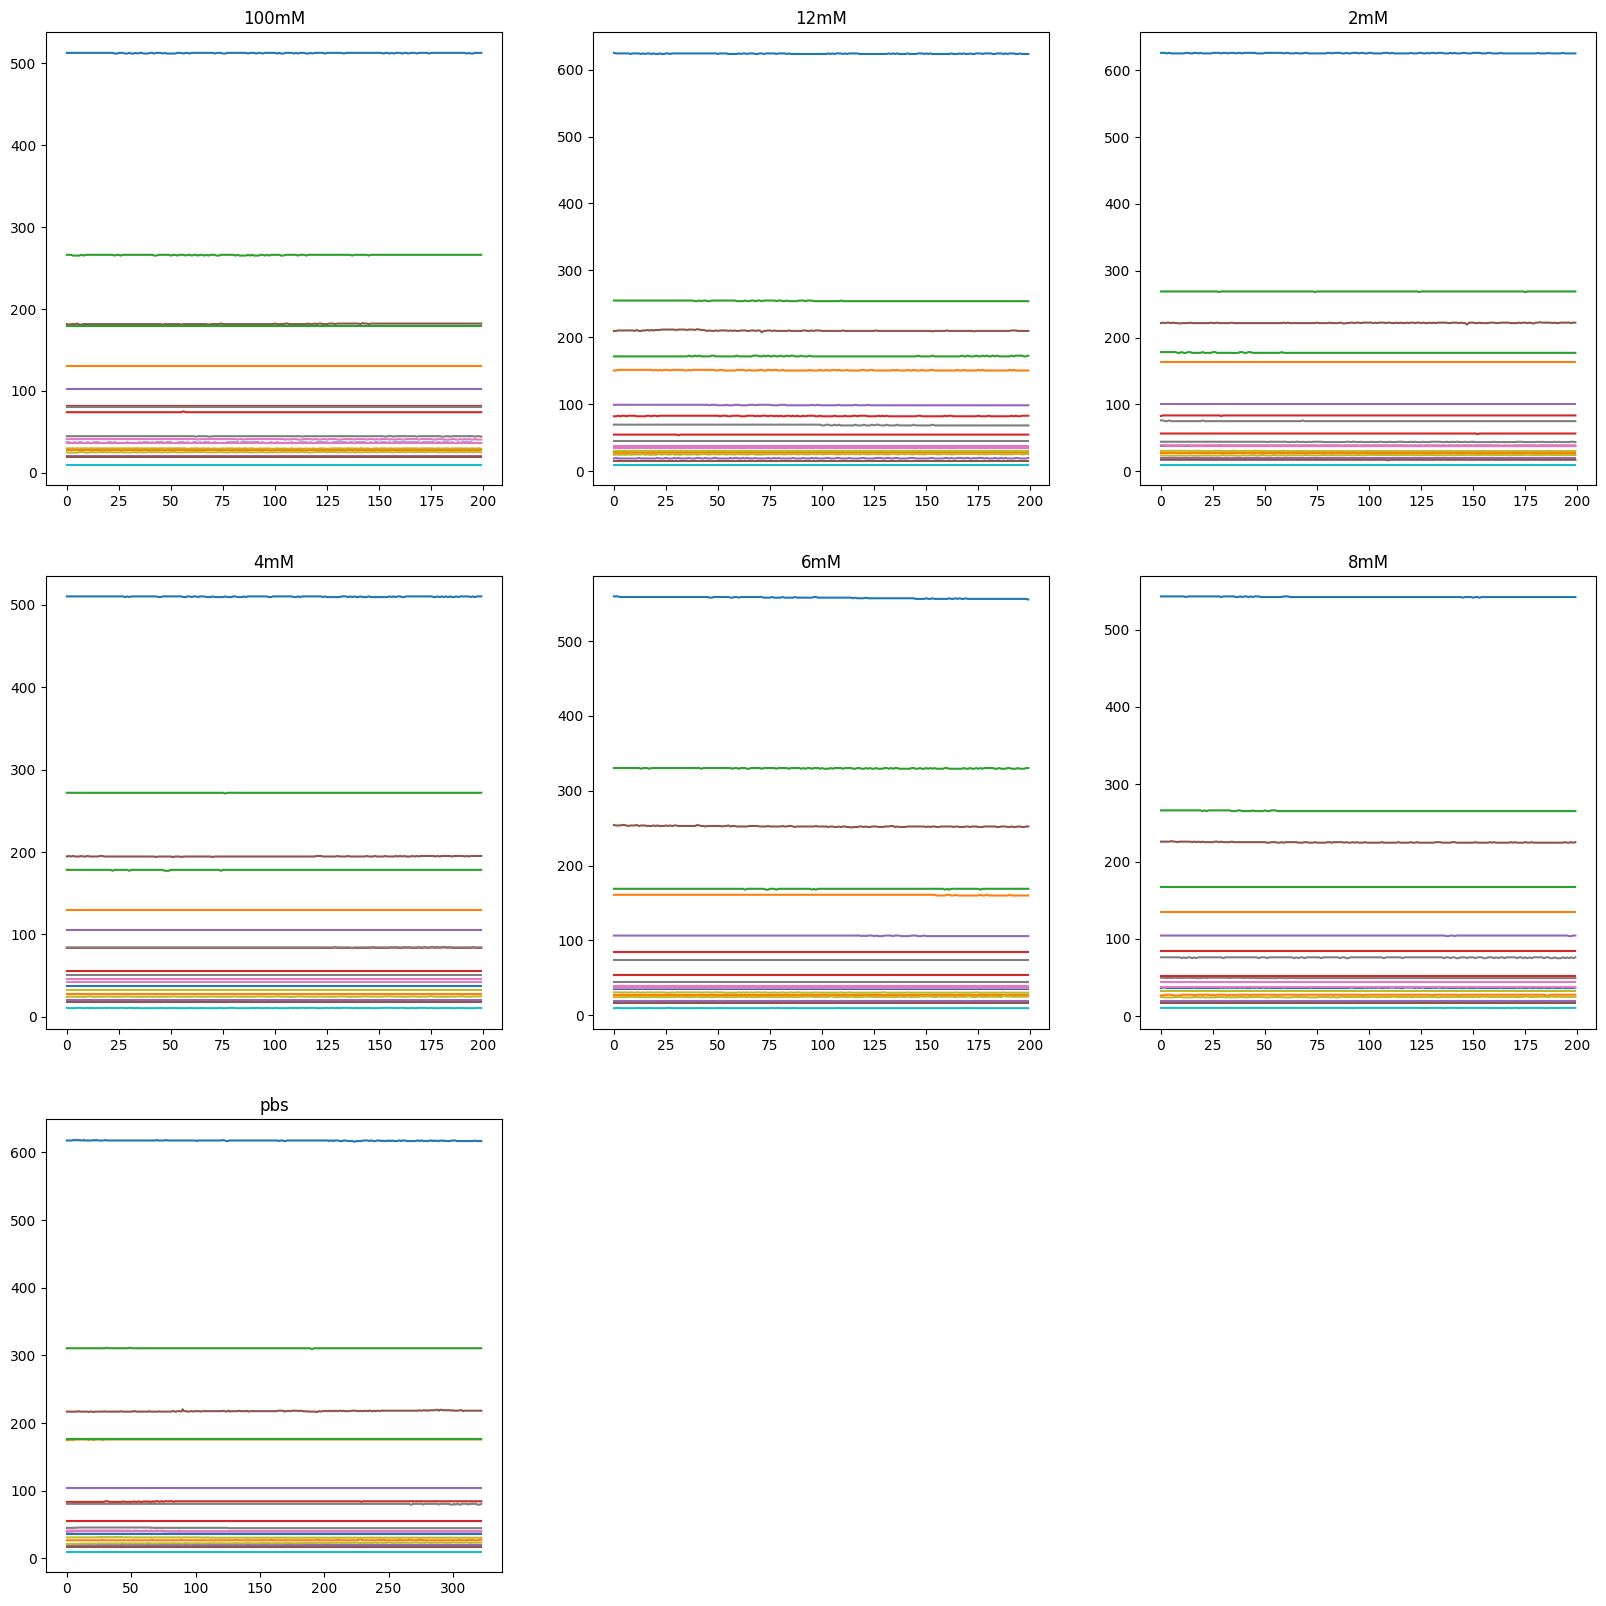

In [123]:
data = get_data()
plt.figure(figsize=(20, 20))
for i, (k, v) in enumerate(data.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(v)
    plt.title(k)
plt.show()


In [124]:
from sklearn.model_selection import train_test_split

data = get_data()
files = ["pbs", "2mM", "4mM", "6mM", "8mM", "12mM"]

features_count = data["pbs"].shape[1]

trainData, trainLabels = np.zeros(shape=(0, features_count)), np.zeros(shape=(0, 1))
testData, testLabels = np.zeros(shape=(0, features_count)), np.zeros(shape=(0, 1))

for file in files:
    file_data = data[file][:200, :]
    label = 0 if file == "pbs" else int(file.replace("mM", ""))
    
    trainX, testX = train_test_split(file_data, test_size=0.1, random_state=42, shuffle=True)
    trainY, testY = np.full((trainX.shape[0], 1), label), np.full((testX.shape[0], 1), label)
    
    trainData = np.concatenate((trainData, trainX), axis=0)
    trainLabels = np.concatenate((trainLabels, trainY), axis=0)
    testData = np.concatenate((testData, testX), axis=0)
    testLabels = np.concatenate((testLabels, testY), axis=0)

print(trainData.shape, trainLabels.shape, testData.shape, testLabels.shape)


(1080, 19) (1080, 1) (120, 19) (120, 1)


In [125]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(trainData, trainLabels)


In [126]:
for ix, pred in enumerate(linReg.predict(testData)):
    print(pred, testLabels[ix])


[0.11695252] [0.]
[-0.12324754] [0.]
[-0.17608885] [0.]
[0.04368966] [0.]
[0.04368966] [0.]
[0.06865865] [0.]
[-0.26657513] [0.]
[0.02893182] [0.]
[0.03164043] [0.]
[0.05715746] [0.]
[-0.18863025] [0.]
[0.04620727] [0.]
[0.06756105] [0.]
[-0.07415697] [0.]
[0.00506042] [0.]
[0.05825651] [0.]
[-0.02505185] [0.]
[0.03164043] [0.]
[0.11947013] [0.]
[0.00805234] [0.]
[2.14997182] [2.]
[2.017463] [2.]
[1.9720829] [2.]
[1.94955778] [2.]
[1.93499094] [2.]
[1.99595429] [2.]
[1.93499094] [2.]
[1.94429548] [2.]
[1.95886233] [2.]
[2.03478176] [2.]
[1.9934006] [2.]
[1.97342917] [2.]
[1.94681309] [2.]
[1.94429548] [2.]
[1.93750855] [2.]
[1.94681309] [2.]
[1.99610922] [2.]
[1.90350715] [2.]
[1.94429548] [2.]
[1.90905632] [2.]
[4.009393] [4.]
[3.96910441] [4.]
[3.9880138] [4.]
[3.9107665] [4.]
[3.97840896] [4.]
[4.009393] [4.]
[4.01869755] [4.]
[3.98367126] [4.]
[4.02395984] [4.]
[3.97840896] [4.]
[4.02144223] [4.]
[3.90146195] [4.]
[4.009393] [4.]
[3.97840896] [4.]
[4.04531363] [4.]
[4.03074678] [4.

In [113]:
linReg.coef_


array([[-0.00875628, -0.20772766, -0.03038995, -0.09556482,  0.10678708,
         0.02232122, -0.36427799,  0.08773568,  0.13630077, -0.13179524,
        -0.28331316, -0.04516392, -0.01909969,  0.03313459, -0.0533533 ,
        -2.87135386, -0.21367204, -0.08116307]])

In [146]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=2, random_state=0)
forest.fit(trainData, trainLabels)


/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=2, random_state=0)

In [147]:
for ix, pred in enumerate(forest.predict(testData)):
    print(pred, testLabels[ix])


0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
0.4641850700217847 [0.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
2.101737752850436 [2.]
3.4476115063580623 [4.]
3.4476115063580623 [4.]
3.4476115063

In [155]:
expData = np.loadtxt("../experiment1/data_controlled_temp/satiated/1.csv", skiprows=1, delimiter=',')
forest.predict(expData)


array([3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.27075749, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.27075749, 3.27075749, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292376,
       3.15292376, 3.15292376, 3.27075749, 3.27075749, 3.27075749,
       3.27075749, 3.27075749, 3.27075749, 3.27075749, 3.27075749,
       3.15292376, 3.15292376, 3.15292376, 3.15292376, 3.15292